# Exercício 01

Considere a seguinte base de dados formada por quatro atributos previsores (Aparência, Temperatura,
Umidade e Vento) e pelo atributo Classe para a classificação.

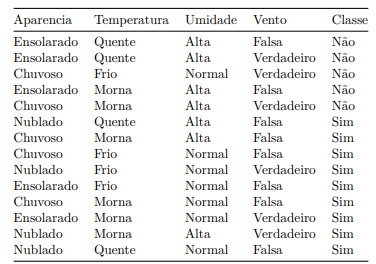

Construa manualmente uma árvore de decisão usando o algoritmo CART discutido em aula, selecionando
os atributos pelo critério Gini.
Dicas.: Lembre-se de fazer partições binárias e escolha o nó de acordo com o critério do menor:


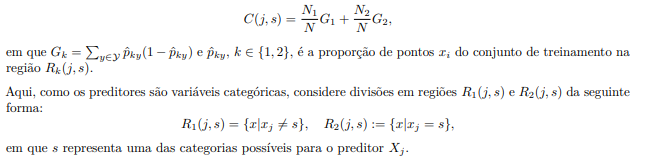

In [ ]:
Por fim, veja se o seu resultado bate com o que é calculado pelo R usando o código abaixo:
tree <- decision_tree( min_n = 5, # Numero de pontos em cada nó para
# encerrar o crescimento da árvore.
cost_complexity = 0, # Custo da penalização
# de poda (regularização)
tree_depth = 10 # Profundidade máxima da árvore

In [ ]:
) %>%
set_engine("rpart") %>%
set_mode("classification")
# Ajuste ao banco df acima. (Você pode pegar o banco olhando
# o .Rmd da Lista07)
t.fit <- tree %>% fit(Classe ~.,df)
# A biblioteca abaixo faz o gráfico da árvore resultante.
library("rpart.plot")
rpart.plot(t.fit$fit)

In [3]:
import pandas as pd
import numpy as np
# Criando a base de dados descrita no enunciado
data = {
   "Aparencia": ["Ensolarado", "Ensolarado", "Chuvoso", "Nublado", "Nublado", "Chuvoso", "Ensolarado", "Chuvoso", "Nublado", "Ensolarado", "Chuvoso", "Nublado", "Nublado", "Nublado"],
   "Temperatura": ["Quente", "Quente", "Frio", "Morna", "Quente", "Morna", "Morna", "Frio", "Quente", "Morna", "Morna", "Quente", "Morna", "Quente"],
   "Umidade": ["Alta", "Alta", "Normal", "Normal", "Alta", "Normal", "Normal", "Normal", "Alta", "Normal", "Normal", "Normal", "Alta", "Normal"],
   "Vento": ["Falso", "Verdadeiro", "Verdadeiro", "Falso", "Verdadeiro", "Verdadeiro", "Falso", "Verdadeiro", "Falso", "Falso", "Verdadeiro", "Falso", "Falso", "Falso"],
   "Classe": ["Nao", "Nao", "Nao", "Sim", "Sim", "Sim", "Nao", "Sim", "Sim", "Nao", "Sim", "Sim", "Sim", "Sim"]
}
df = pd.DataFrame(data)
# Função para calcular o índice Gini
def gini(groups, classes):
   """
   Calcula o índice de Gini para medir a impureza de uma divisão.
   Parâmetros:
   - groups: Lista de grupos resultantes de uma divisão (ex.: esquerda e direita).
   - classes: Lista de todas as classes possíveis no conjunto de dados (ex.: ["Sim", "Nao"]).
   Retorna:
   - gini_index: Índice Gini ponderado para a divisão.
   Explicação:
   - Para cada grupo:
       1. Calcula a proporção (p) de instâncias de cada classe dentro do grupo.
       2. Soma os quadrados das proporções para obter uma métrica de pureza.
       3. Subtrai a soma das proporções de 1 para obter a impureza do grupo.
   - O índice Gini é ponderado pelo tamanho relativo de cada grupo.
   """
   n_instances = sum([len(group) for group in groups])  # Número total de instâncias
   gini_index = 0.0  # Inicializa o índice Gini
   for group in groups:  # Itera por cada grupo (esquerda e direita)
       size = len(group)  # Tamanho do grupo atual
       if size == 0:  # Evita divisão por zero
           continue
       score = 0.0  # Inicializa o score do grupo
       for class_val in classes:  # Itera por cada classe
           p = group.count(class_val) / size  # Proporção da classe no grupo
           score += p * p  # Soma o quadrado da proporção
       gini_index += (1 - score) * (size / n_instances)  # Índice Gini ponderado pelo tamanho
   return gini_index

# Função para dividir os dados
def test_split(index, value, dataset):
   """
   Divide os dados em dois grupos (esquerda e direita) com base em um atributo e um valor.
   Parâmetros:
   - index: Índice da coluna do atributo a ser avaliado.
   - value: Valor do atributo usado como critério de divisão.
   - dataset: Lista completa de dados.
   Retorna:
   - left: Grupo com os dados que atendem ao critério (igual ao valor).
   - right: Grupo com os dados que não atendem ao critério.
   """
   left, right = [], []  # Inicializa os dois grupos
   for row in dataset:  # Itera por todas as linhas do dataset
       if row[index] == value:  # Verifica se o valor do atributo atende ao critério
           left.append(row)  # Adiciona ao grupo esquerdo
       else:
           right.append(row)  # Adiciona ao grupo direito
   return left, right

# Avaliando o melhor split
def get_split(dataset):
   """
   Encontra o melhor atributo e valor para dividir os dados, minimizando o índice Gini.
   Parâmetros:
   - dataset: Lista contendo todas as linhas do nó atual.
   Retorna:
   - Um dicionário com o índice do atributo, valor da divisão e os grupos resultantes.
   """
   class_values = list(set(row[-1] for row in dataset))  # Lista de classes únicas no dataset
   b_index, b_value, b_score, b_groups = None, None, float("inf"), None  # Inicializa as variáveis do melhor split
   for index in range(len(dataset[0]) - 1):  # Itera por cada coluna (exceto a classe)
       for row in dataset:  # Itera por cada linha do dataset
           groups = test_split(index, row[index], dataset)  # Divide os dados com base no valor atual
           gini_index = gini(groups, class_values)  # Calcula o índice Gini para a divisão
           if gini_index < b_score:  # Verifica se o índice Gini é o menor encontrado
               b_index, b_value, b_score, b_groups = index, row[index], gini_index, groups  # Atualiza o melhor split
   return {"index": b_index, "value": b_value, "groups": b_groups}  # Retorna o melhor split

# Transformando o DataFrame em lista para manipulação
data_list = df.values.tolist()  # Converte o DataFrame para uma lista de listas

# Obter o melhor split para o nó raiz
best_split = get_split(data_list)  # Calcula o melhor split
print(f"Melhor atributo para divisão: {df.columns[best_split['index']]}")  # Exibe o atributo do melhor split
print(f"Valor do split: {best_split['value']}")  # Exibe o valor do split
print(f"Índice Gini: {gini(best_split['groups'], list(df['Classe'].unique()))}")  # Exibe o índice Gini do melhor split

Melhor atributo para divisão: Aparencia
Valor do split: Ensolarado
Índice Gini: 1.0


# Exercício 02

É possível melhorar o desempenho de um classificador usando um comitê/ensemble? Quais as vantagens de
se usar comitês? Quais são as principais diferenças entre as técnicas de bagging e boosting?

Sim é totalmente possível! Pois a ideia do ensemble é combinar várias previsões de diferentes modelos individuais para criar uma solução mais variada e robusta e com maior precisão.

As diferenças entre o Bagging e o Boosting:

O Baggin treina vários modelos independente em subconjuntos aleatórios dos dados e combina suas previsões e utiliza a amostragem de boostrap que cria mutiplos subconjuntos do mesmo tamanho de seu conjunto original, e asssim ele vai treinando o modelo com varias amostras ficticias dos dados originais, cada subconjunto pode aparecer mais de uma vez enquanto outras podem nem aparecer no treinamento.

Como cada modelo é treinado com um conjunto diferente suas previsões podem variar, logo a combinação das previsões é dada da seguinte maneira:


*   Na Classificação faz- se uma votação por maioria (a classe mais votada é escolhida)
*  Na Regressão é uma média das previsões nos diferentes modelos.




O Boosting treina modelos sequencialmente (um por vez), cada um tentando corrigir os erros do modelo anterior, o primeiro modelo treinado no conjunto de dados originais e com os mesmos pesos, o que muda a partir do primeiro é que todos os próximos tem seus pesos ajustados nas amostras de acordo com os erros do primeiro modelo fazendo com que os próximos modelos foquem as amostras mais dificeis onde o modelo anterior errou.

Resultados finais:


*   Na classificação é uma soma ponderada dos votos de cada classe do modelo, os modelos com menos erros recebem maior peso.
*   Na regressão cada modelo contribui para uma previsão de valor númerico, e o resultado final também é uma soma ponderada com base no valor continuo predito resultante




# Exercício 03

Usando o banco de dados BostonHousing da biblioteca mlbench, faça um processo de validação cruzada para
escolher o melhor parâmetro de regularização α (ou seja, o parâmetro cost_complexity). Você pode deixar
min_n=5 e tree_depth = 10. Faça o gráfico da árvore resultante.

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:320: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=531
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=853

  warn(warning_msg)


Melhor alpha (cost_complexity): 1.0227907826495715


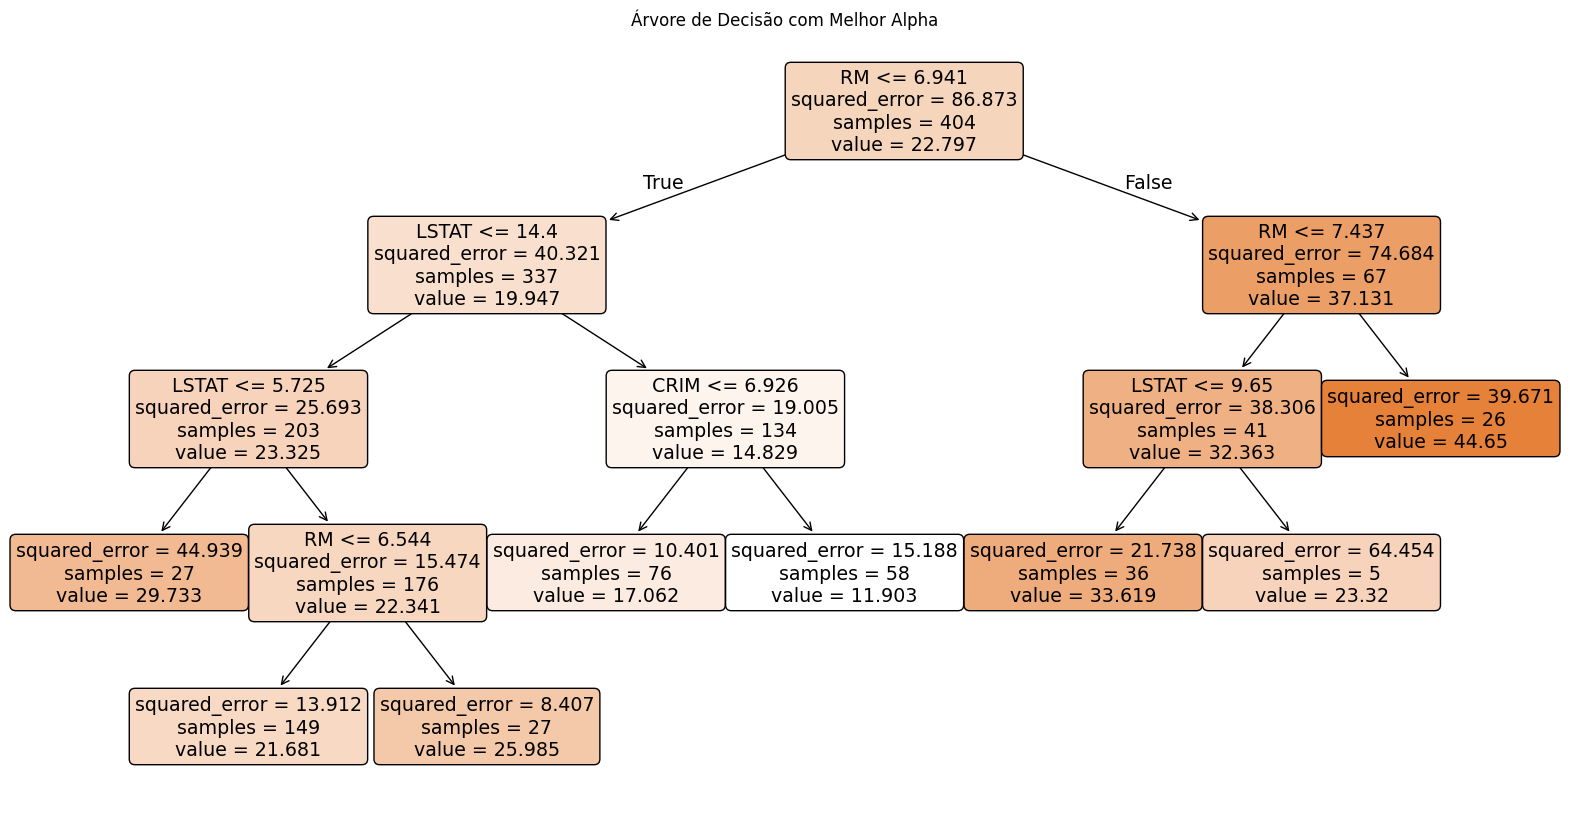

R² no conjunto de teste: 0.7199


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import GridSearchCV

def train_model_with_cross_validation(X, y, min_samples_leaf=5, max_depth=10):
   """
   Treina uma árvore de decisão usando validação cruzada para determinar o melhor parâmetro ccp_alpha.
   Parâmetros:
   - X: Conjunto de dados de entrada (features).
   - y: Conjunto de dados alvo (target).
   - min_samples_leaf: Mínimo de amostras por folha.
   - max_depth: Profundidade máxima da árvore.
   Retorna:
   - Modelo treinado com o melhor ccp_alpha.
   - Melhor valor de ccp_alpha.
   - R² no conjunto de teste.
   """
   # Dividir os dados em treino e teste
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   # Configurar o modelo inicial
   tree = DecisionTreeRegressor(min_samples_leaf=min_samples_leaf, max_depth=max_depth, random_state=42)

   # Obter os valores de ccp_alpha usando o caminho de pruning
   path = tree.cost_complexity_pruning_path(X_train, y_train)

   ccp_alphas = path.ccp_alphas[:-1]  # Remover o último alpha que resulta em uma árvore com apenas um nó

   # Lista para armazenar os scores de validação cruzada
   scores = []
   for alpha in ccp_alphas:
       tree = DecisionTreeRegressor(min_samples_leaf=min_samples_leaf, max_depth=max_depth, random_state=42, ccp_alpha=alpha)
       score = np.mean(cross_val_score(tree, X_train, y_train, cv=5, scoring="neg_mean_squared_error"))
       scores.append(score)

   # Identificar o melhor alpha
   best_alpha = ccp_alphas[np.argmax(scores)]
   print(f"Melhor alpha (cost_complexity): {best_alpha}")

   # Treinar o modelo final com o melhor alpha
   final_tree = DecisionTreeRegressor(min_samples_leaf=min_samples_leaf, max_depth=max_depth, random_state=42, ccp_alpha=best_alpha)
   final_tree.fit(X_train, y_train)

   # Visualizar a árvore resultante
   plt.figure(figsize=(20, 10))
   plot_tree(final_tree, feature_names=X.columns, filled=True, rounded=True)
   plt.title("Árvore de Decisão com Melhor Alpha")
   plt.show()


   # Avaliar o modelo no conjunto de teste
   test_score = final_tree.score(X_test, y_test)
   print(f"R² no conjunto de teste: {test_score:.4f}")
   return final_tree, best_alpha, test_score


# Código principal
# Carregar o conjunto de dados BostonHousing
boston = fetch_openml(name="boston", as_frame=True)
X = boston.data
y = boston.target
# Treinar o modelo com a função
final_model, best_alpha, test_score = train_model_with_cross_validation(X, y)

# Exercício 04

Usando novamente o banco de dados BostonHousing, ajuste modelos de RandomForests e Boosting Trees.
Use os comandos rand_forest e boost_tree para definir os modelos, usando as engines randomForest e
xgboost para cada um dos algoritmos, respectivamente.

Para a RandomForest, dê um valor alto para o parâmetro trees (por exemplo 500) use min_n = 5 e faça o
parâmetro mtry =√
d.
Para a Boosting Treee, use o mesmo número de árvores da RandomForest no parâmetro trees e taxa de
aprendizado learn_rate = 0.01.

Deixe os outros parâmetros em seu padrão (sem alteração).

Faça o processo de validação cruzada para estimar o RMSE e discuta os resultados. Leve em consideração o
std_err dos seus resultados.

OBS.: A biblioteca xgboost implementa o algoritmo Gradient Boosting que não é bem o algoritmo que
vimos em aula, mas a idéia é similar.

In [10]:
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OrdinalEncoder

In [11]:
def compare_models_with_cross_validation(X, y, n_estimators=500, min_samples_leaf=5, learning_rate=0.01, cv=5):
   """
   Compara os modelos Random Forest e Gradient Boosting usando validação cruzada.
   Parâmetros:
   - X: Conjunto de dados de entrada (features)
   - y: Conjunto de dados alvo (target)
   - n_estimators: Número de árvores em ambos os modelos
   - min_samples_leaf: Mínimo de amostras em cada folha para Random Forest
   - learning_rate: Taxa de aprendizado para o Gradient Boosting
   - cv: Número de folds para validação cruzada
   Retorna:
   - DataFrame com os resultados comparativos
   """
   # Configurar o modelo Random Forest
   random_forest = RandomForestRegressor(
       n_estimators=n_estimators,      # Número de árvores
       max_features="sqrt",           # max_features = raiz quadrada do número de atributos
       min_samples_leaf=min_samples_leaf,  # min_samples_leaf = min_n = 5
       random_state=42                # Semente para reprodutibilidade
   )
   # Configurar o modelo Gradient Boosting (XGBoost)
   boost_tree = XGBRegressor(
       n_estimators=n_estimators,     # Número de árvores
       learning_rate=learning_rate,  # Taxa de aprendizado
       random_state=42,              # Semente para reprodutibilidade
       enable_categorical=True       # Habilita suporte para variáveis categóricas
   )
   # Validação cruzada para Random Forest
   rf_scores = cross_val_score(
       random_forest, X, y, cv=cv, scoring="neg_mean_squared_error"
   )
   rf_rmse = np.sqrt(-rf_scores)  # Calcular RMSE (Raiz do Erro Medio Quadratico)
   print(f"Random Forest RMSE: {rf_rmse.mean():.4f} ± {rf_rmse.std():.4f}")
   # Validação cruzada para Gradient Boosting
   boost_scores = cross_val_score(
       boost_tree, X, y, cv=cv, scoring="neg_mean_squared_error"
   )
   boost_rmse = np.sqrt(-boost_scores)  # Calcular RMSE (Raiz do Erro Medio Quadratico)
   print(f"Boosting Trees RMSE: {boost_rmse.mean():.4f} ± {boost_rmse.std():.4f}")

   # Comparar os resultados em um DataFrame
   results = pd.DataFrame({
       "Model": ["Random Forest", "Boosting Trees"],
       "RMSE Mean": [rf_rmse.mean(), boost_rmse.mean()],
       "RMSE Std": [rf_rmse.std(), boost_rmse.std()]
   })
   return results
# Carregar o banco de dados Bostonhousing
boston = fetch_openml(name="boston", as_frame=True)
X = boston.data
y = boston.target
# Corrigir colunas categóricas (se existirem)
# Converte para numérico se houver colunas categoricas
categorical_cols = X.select_dtypes(include=["category"]).columns
if len(categorical_cols) > 0:
   encoder = OrdinalEncoder()
   X[categorical_cols] = encoder.fit_transform(X[categorical_cols])
# Executar a função e exibir os resultados
results = compare_models_with_cross_validation(X, y)
print("\nResultados Comparativos:")
print(results)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:320: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=531
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=853

  warn(warning_msg)
<ipython-input-11-17e58e01d1a3>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[categorical_cols] = encoder.fit_transform(X[categorical_cols])


Random Forest RMSE: 4.7194 ± 1.3496
Boosting Trees RMSE: 5.0712 ± 1.3464

Resultados Comparativos:
            Model  RMSE Mean  RMSE Std
0   Random Forest   4.719435  1.349596
1  Boosting Trees   5.071213  1.346367


# Exercício 05

Vimos que as Random Forests, como os métodos baseados em Bagging, podem ser usadas para identificar
as variáveis mais importantes.
 Explique como essas variáveis mais importantes são identificadas e calcule
as variáveis mais importantes dos dados BostonHousing.

Identifique as três variáveis mais importante de
acordo com esse critério.

Dica: Use a função vip para fazer o gráfico das variáveis mais importantes. Se a variável rf.fit contêm o
modelo ajustado retornado pela função fit, basta chamar vip(rf.fit)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:320: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=531
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=853

  warn(warning_msg)



As três variáveis mais importantes:
   Feature  Importance
5       RM    0.290001
12   LSTAT    0.261563
4      NOX    0.077905


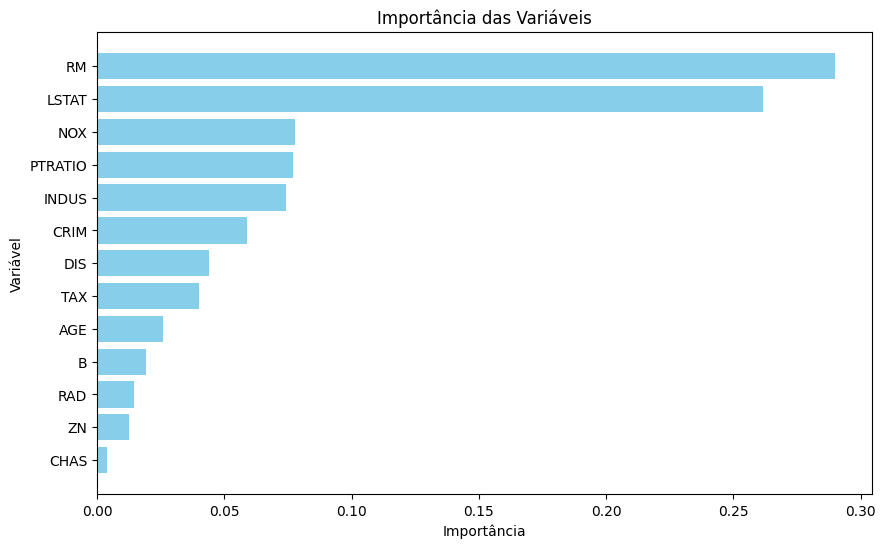

In [13]:
def calculate_feature_importance(X, y, n_estimators=500, min_samples_leaf=5):
   """
   Calcula e exibe as variáveis mais importantes usando Random Forest.
   Parâmetros:
   - X: Conjunto de dados de entrada (features).
   - y: Conjunto de dados alvo (target).
   - n_estimators: Número de árvores no Random Forest.
   - min_samples_leaf: Mínimo de amostras por folha.
   Retorna:
   - DataFrame com a importância das variáveis.
   """
   # Treinar o modelo Random Forest
   rf = RandomForestRegressor(
       n_estimators=n_estimators,
       max_features="sqrt",
       min_samples_leaf=min_samples_leaf,
       random_state=42
   )
   rf.fit(X, y)  # Ajustar o modelo aos dados
   # Extrair a importância das variáveis
   feature_importance = rf.feature_importances_
   importance_df = pd.DataFrame({
       "Feature": X.columns,
       "Importance": feature_importance
   }).sort_values(by="Importance", ascending=False)
   # Exibir as três variáveis mais importantes
   print("\nAs três variáveis mais importantes:")
   print(importance_df.head(3))

   # Plotar a importância das variáveis
   plt.figure(figsize=(10, 6))
   plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
   plt.gca().invert_yaxis()  # Inverter a ordem para a maior importância no topo
   plt.title("Importância das Variáveis")
   plt.xlabel("Importância")
   plt.ylabel("Variável")
   plt.show()
   return importance_df
# Carregar o banco de dados Bostonhousing
boston = fetch_openml(name="boston", as_frame=True)
X = boston.data
y = boston.target
# Calcular e exibir as variáveis mais importantes
importance_df = calculate_feature_importance(X, y)